Libraries Used

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
#plt.style.use("seaborn-whitegrid")
from scipy import stats
import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

In [2]:
# Loading the Dataset and creating a pandas dataframe
df = pd.read_csv('datasets/weatherAUS.csv')

Exploring Dataset


In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [7]:
df.isnull().sum()/len(df)*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

DATA CLEANING

<AxesSubplot:>

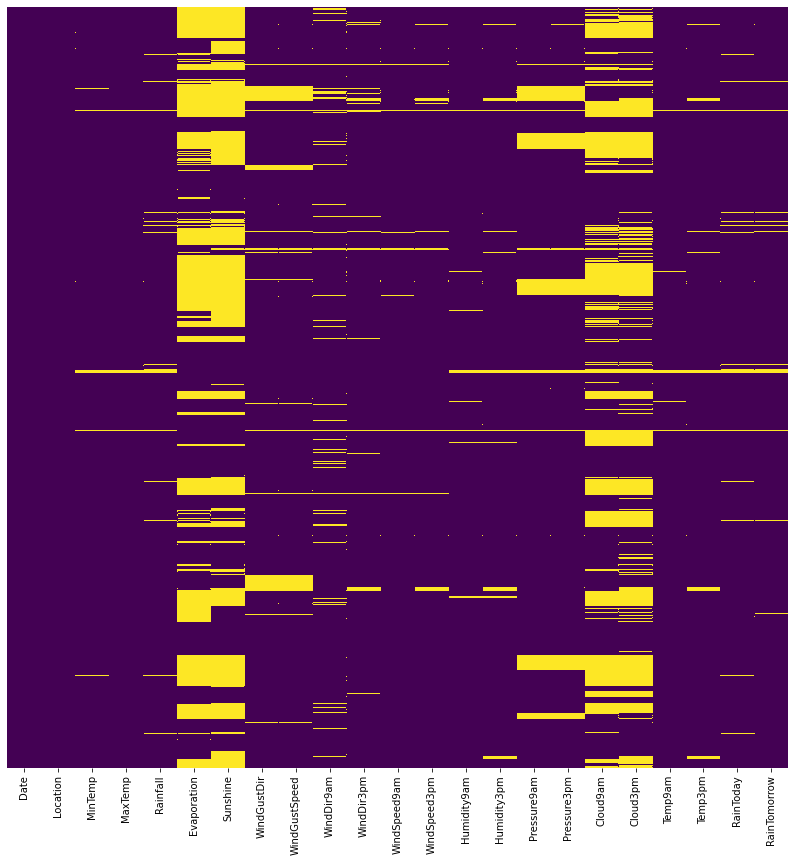

In [8]:
plt.figure(figsize=(14,14))
sns.heatmap(df.isnull(),yticklabels = False , cbar = False,cmap="viridis")

<AxesSubplot:xlabel='MinTemp', ylabel='Density'>

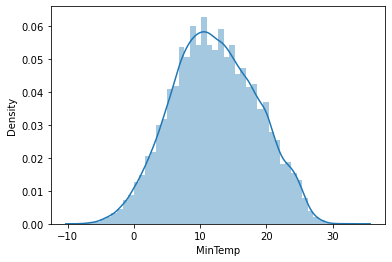

In [9]:
sns.distplot(df['MinTemp'])

In [10]:
df.MinTemp.value_counts()

 11.0    899
 10.2    898
 9.6     896
 10.5    884
 10.8    872
        ... 
-7.2       1
 31.2      1
 30.3      1
 31.8      1
 31.0      1
Name: MinTemp, Length: 389, dtype: int64

In [11]:
df['MinTemp'].fillna(value = df['MinTemp'].mean(), inplace = True)

In [12]:
df['MaxTemp'].fillna(value = df['MaxTemp'].mean(), inplace = True)

In [13]:
df.Rainfall.value_counts()

0.0      91080
0.2       8761
0.4       3782
0.6       2592
0.8       2056
         ...  
106.0        1
170.4        1
90.0         1
172.2        1
74.4         1
Name: Rainfall, Length: 681, dtype: int64

In [14]:
df['Rainfall'].fillna(value = 0.00,inplace = True)

In [15]:
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [16]:
df.Evaporation.value_counts()

4.0     3339
8.0     2609
2.2     2095
2.0     2032
2.4     2003
        ... 
42.4       1
50.4       1
57.2       1
56.2       1
44.0       1
Name: Evaporation, Length: 358, dtype: int64

In [17]:
df.Evaporation.fillna(value=df.Evaporation.mean(),inplace = True)

In [18]:
df.Sunshine.fillna(value=df.Sunshine.mean(),inplace = True)

In [19]:
df.WindGustDir.value_counts()

W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64

In [20]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [21]:
df.dropna(subset=['WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm'],inplace = True)

In [22]:
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir          0
WindGustSpeed        0
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am       1518
Humidity3pm       2031
Pressure9am       9655
Pressure3pm       9607
Cloud9am         48207
Cloud3pm         50181
Temp9am            835
Temp3pm           1289
RainToday         2327
RainTomorrow      2172
dtype: int64

In [23]:
df.Humidity9am.fillna(value=df.Humidity9am.mean(),inplace = True)

In [24]:
df.Humidity3pm.fillna(value=df.Humidity3pm.mean(),inplace = True)

<AxesSubplot:>

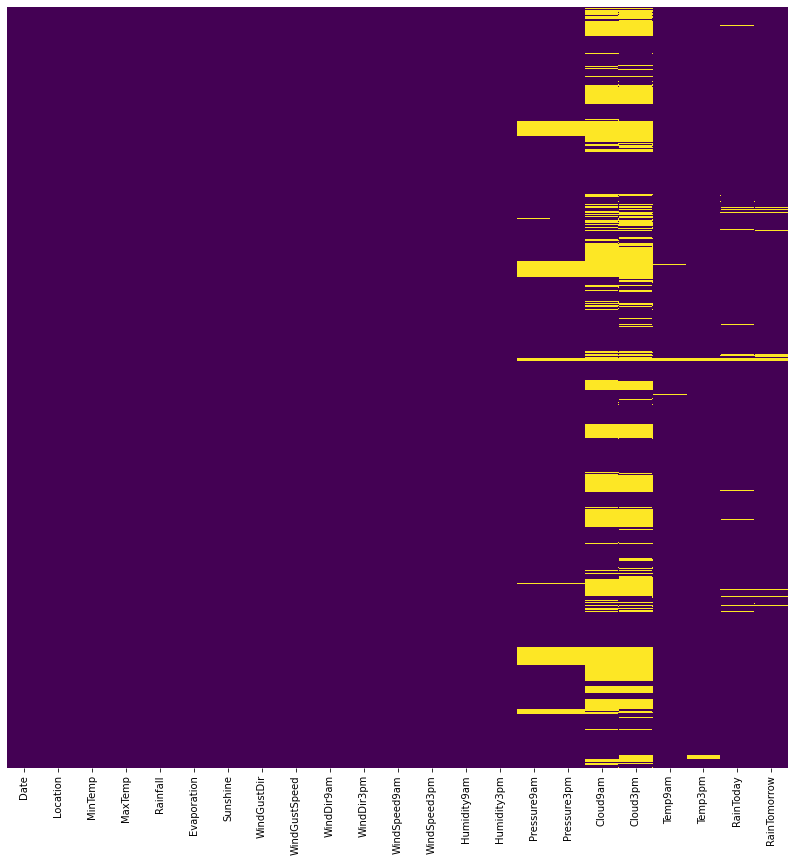

In [25]:
plt.figure(figsize=(14,14))
sns.heatmap(df.isnull(),yticklabels = False , cbar = False,cmap="viridis")

In [26]:
df.Pressure9am.fillna(value=df.Pressure9am.mean(),inplace = True)


In [27]:
df.Pressure3pm.fillna(value=df.Pressure3pm.mean(),inplace = True)

In [28]:
df.Cloud9am.fillna(value=df.Cloud9am.mean(),inplace = True)


In [29]:
df.Cloud3pm.fillna(value=df.Cloud3pm.mean(),inplace = True)


In [30]:
df.Temp9am.fillna(value=df.Temp9am.mean(),inplace = True)


In [31]:
df.Temp3pm.fillna(value=df.Temp3pm.mean(),inplace = True)

In [32]:
df.RainTomorrow.value_counts()

No     96761
Yes    27907
Name: RainTomorrow, dtype: int64

In [33]:
df.RainToday.value_counts()

No     96493
Yes    28020
Name: RainToday, dtype: int64

In [34]:
df = pd.get_dummies(columns=['RainToday','RainTomorrow'],data = df,drop_first = True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126840 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              126840 non-null  object 
 1   Location          126840 non-null  object 
 2   MinTemp           126840 non-null  float64
 3   MaxTemp           126840 non-null  float64
 4   Rainfall          126840 non-null  float64
 5   Evaporation       126840 non-null  float64
 6   Sunshine          126840 non-null  float64
 7   WindGustDir       126840 non-null  object 
 8   WindGustSpeed     126840 non-null  float64
 9   WindDir9am        126840 non-null  object 
 10  WindDir3pm        126840 non-null  object 
 11  WindSpeed9am      126840 non-null  float64
 12  WindSpeed3pm      126840 non-null  float64
 13  Humidity9am       126840 non-null  float64
 14  Humidity3pm       126840 non-null  float64
 15  Pressure9am       126840 non-null  float64
 16  Pressure3pm       12

<AxesSubplot:>

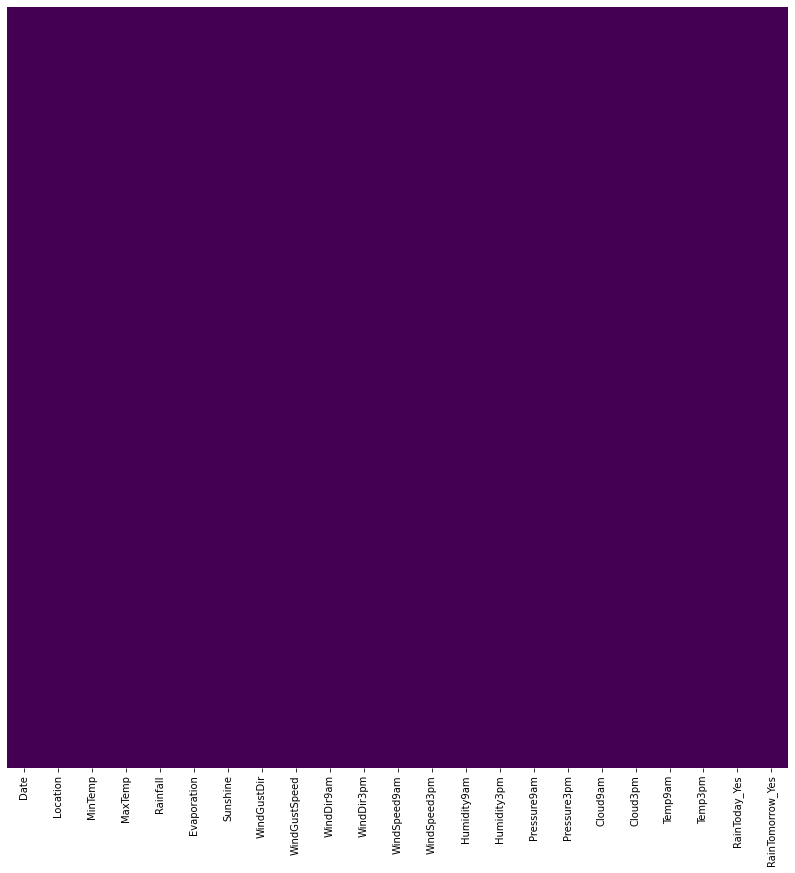

In [36]:
plt.figure(figsize=(14,14))
sns.heatmap(df.isnull(),yticklabels = False , cbar = False,cmap="viridis")

In [ ]:
Visualising Data

In [55]:
def boxplot(df):
    plt.figure(figsize=(10,6))
    plt.title('Boxplot')
    sns.boxplot(df)
    plt.show()


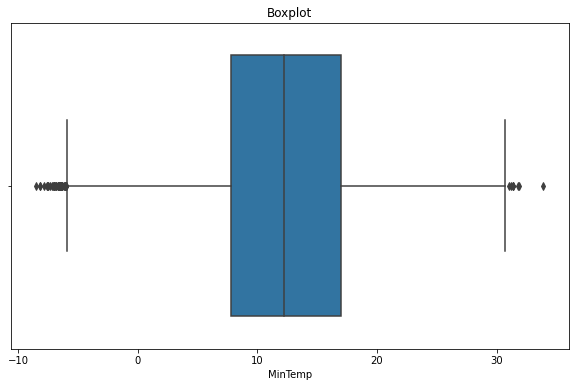

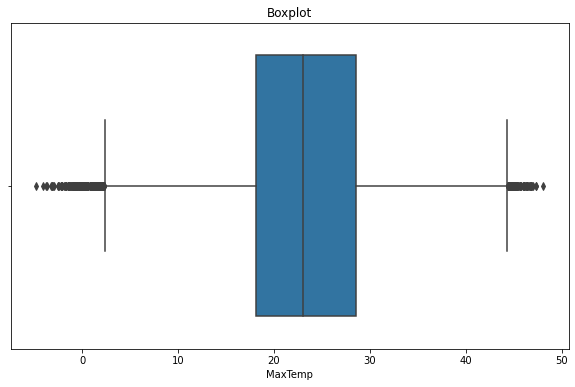

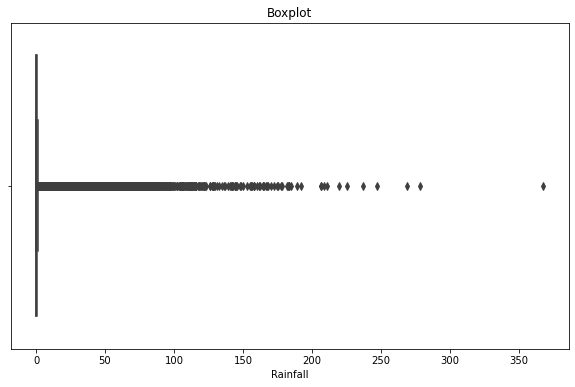

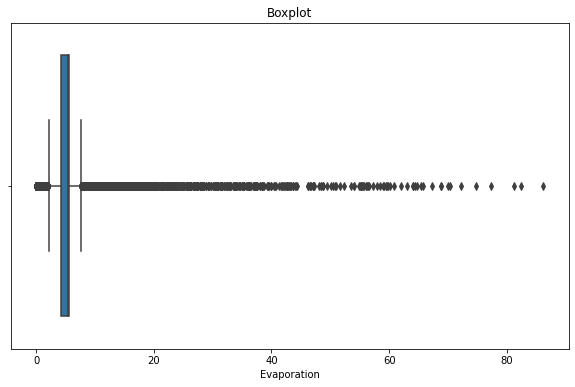

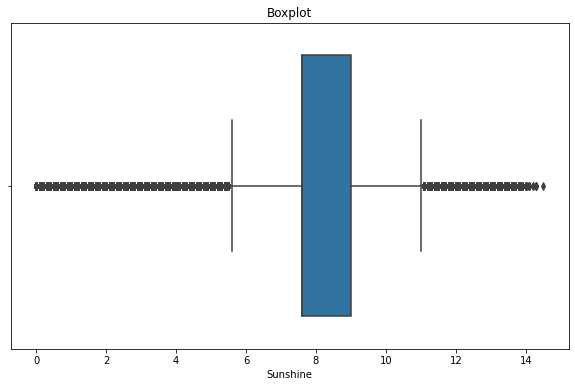

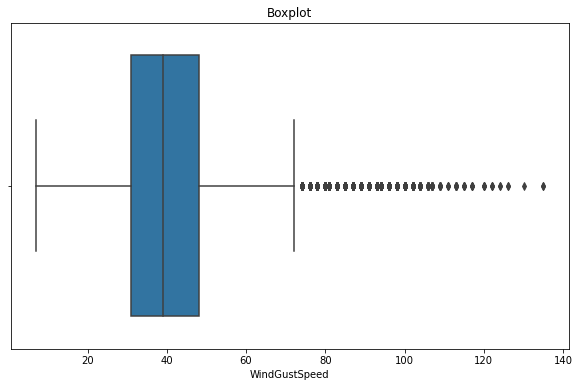

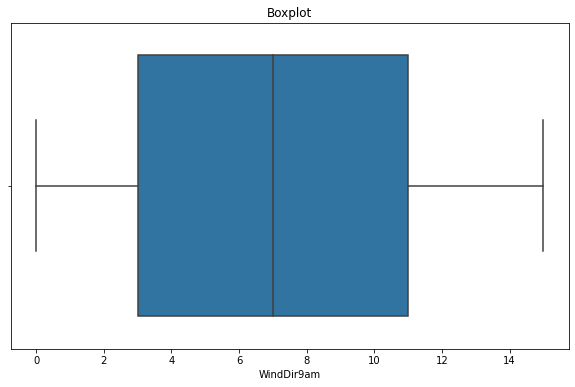

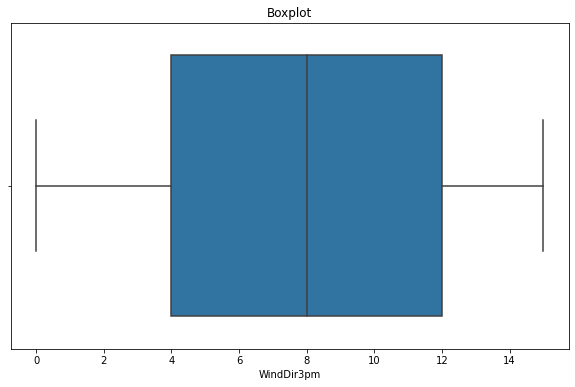

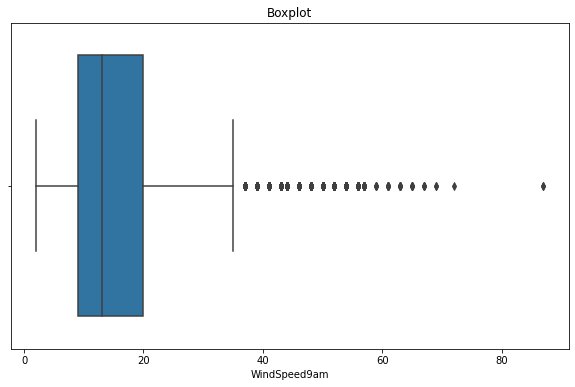

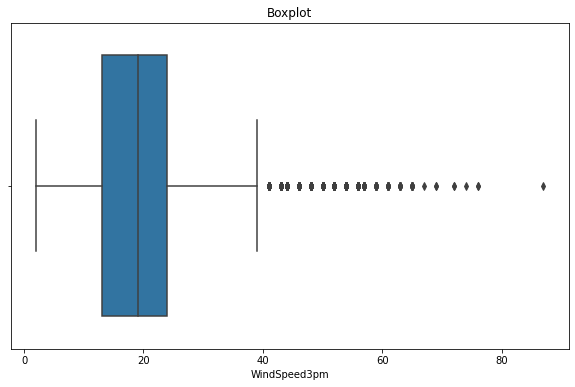

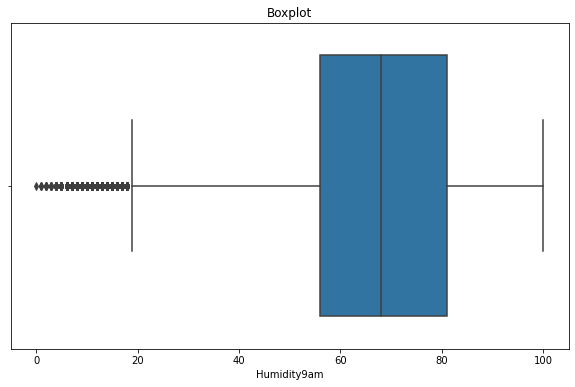

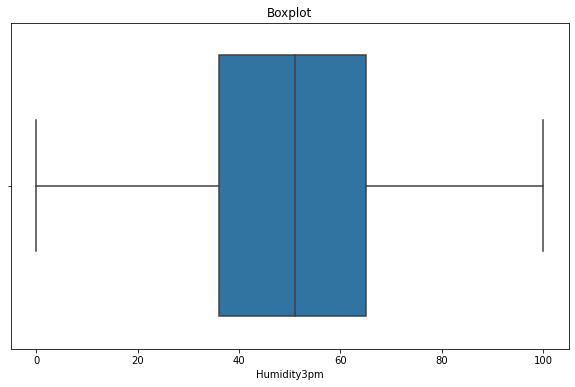

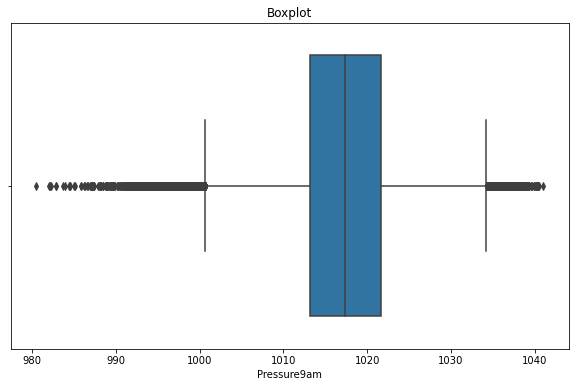

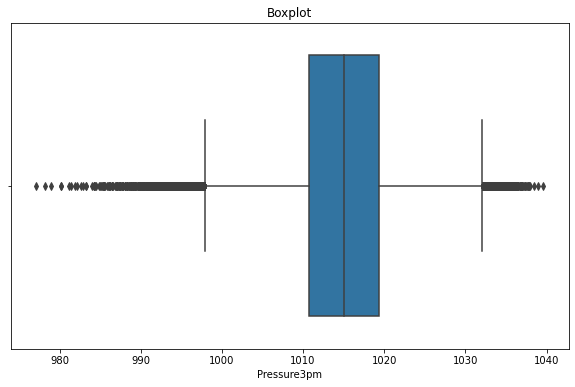

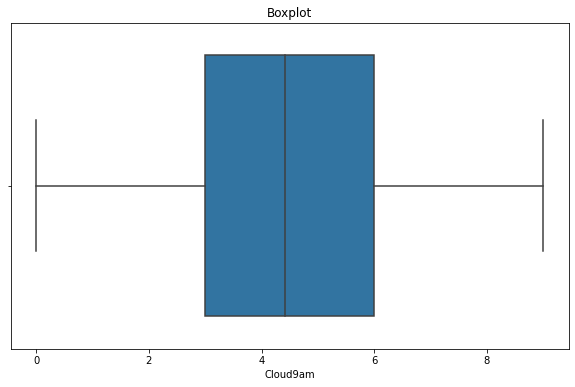

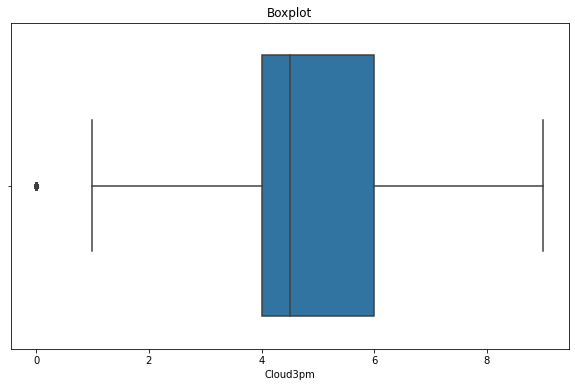

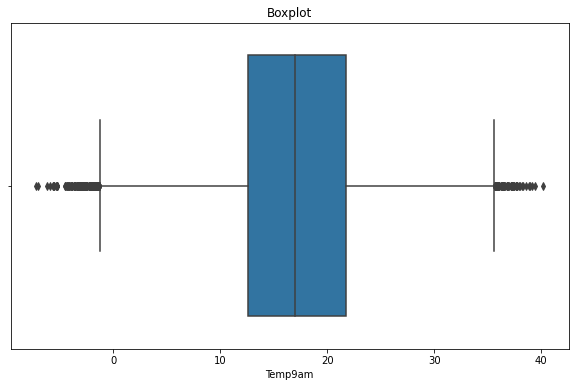

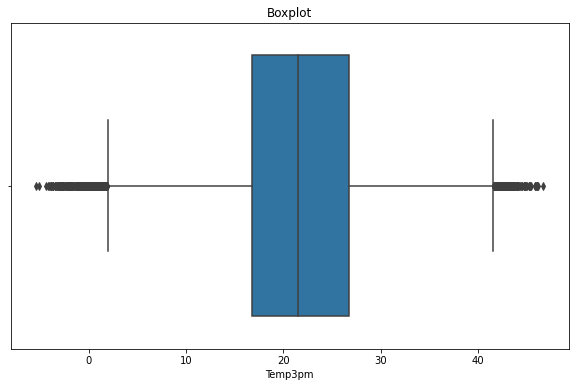

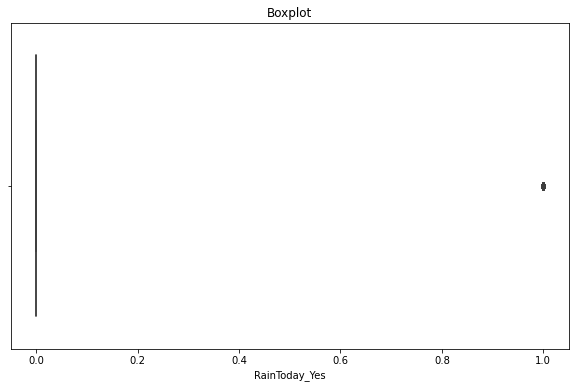

In [56]:
num_col=X.select_dtypes(include=[np.number]).columns
num_cols=[n for n in num_col]
 
for n in num_cols:
    boxplot(X[n])

<AxesSubplot:xlabel='RainTomorrow_Yes', ylabel='count'>

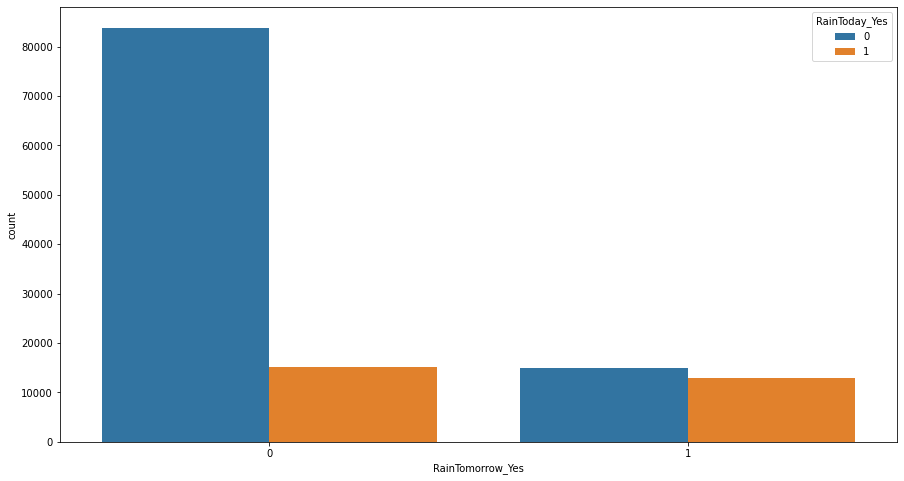

In [37]:
plt.figure(figsize = (15,8))
sns.countplot(x='RainTomorrow_Yes',data=df,hue='RainToday_Yes')

In [38]:
print(df.corr())

                   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp           1.000000  0.737598  0.098871     0.361609  0.057549   
MaxTemp           0.737598  1.000000 -0.079446     0.448961  0.337235   
Rainfall          0.098871 -0.079446  1.000000    -0.044207 -0.176646   
Evaporation       0.361609  0.448961 -0.044207     1.000000  0.290957   
Sunshine          0.057549  0.337235 -0.176646     0.290957  1.000000   
WindGustSpeed     0.140976  0.037331  0.129240     0.140757 -0.036732   
WindSpeed9am      0.137320 -0.015276  0.083674     0.131575 -0.006624   
WindSpeed3pm      0.152612  0.023193  0.058947     0.081514  0.022950   
Humidity9am      -0.215030 -0.503400  0.235112    -0.382182 -0.358357   
Humidity3pm      -0.000415 -0.507906  0.256483    -0.294656 -0.451729   
Pressure9am      -0.414269 -0.296760 -0.162957    -0.205849  0.039835   
Pressure3pm      -0.429451 -0.391124 -0.122830    -0.227297 -0.007039   
Cloud9am          0.053245 -0.233289  0.172321    -

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Temp9am'>

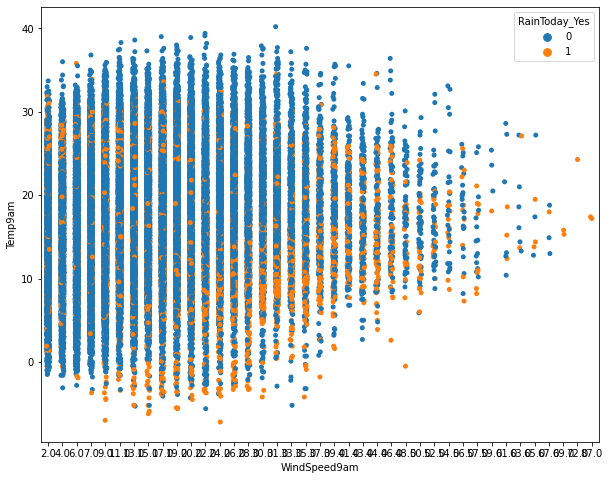

In [39]:
plt.figure(figsize = (10,8))
sns.stripplot(x="WindSpeed9am", y="Temp9am", hue="RainToday_Yes",data=df)

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Temp9am'>

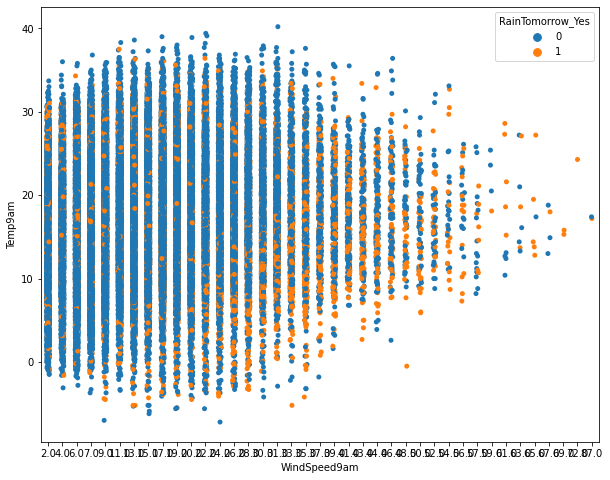

In [40]:
plt.figure(figsize = (10,8))
sns.stripplot(x="WindSpeed9am", y="Temp9am", hue="RainTomorrow_Yes",data=df)

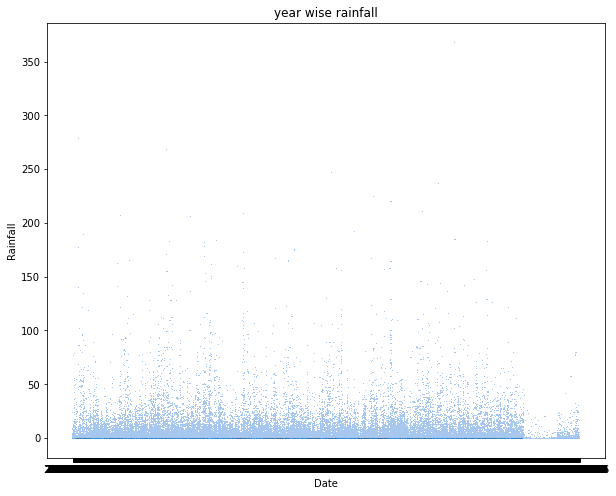

In [41]:
plt.figure(figsize = (10,8))
sns.histplot(y=df['Rainfall'],x=df['Date'])
plt.title('year wise rainfall')
plt.show()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126840 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              126840 non-null  object 
 1   Location          126840 non-null  object 
 2   MinTemp           126840 non-null  float64
 3   MaxTemp           126840 non-null  float64
 4   Rainfall          126840 non-null  float64
 5   Evaporation       126840 non-null  float64
 6   Sunshine          126840 non-null  float64
 7   WindGustDir       126840 non-null  object 
 8   WindGustSpeed     126840 non-null  float64
 9   WindDir9am        126840 non-null  object 
 10  WindDir3pm        126840 non-null  object 
 11  WindSpeed9am      126840 non-null  float64
 12  WindSpeed3pm      126840 non-null  float64
 13  Humidity9am       126840 non-null  float64
 14  Humidity3pm       126840 non-null  float64
 15  Pressure9am       126840 non-null  float64
 16  Pressure3pm       12

Converting Categorical Data Using Label Encoder

In [43]:
le = LabelEncoder()
label = le.fit_transform(df['WindGustDir'].astype(str))

In [44]:
label

array([13, 14, 15, ...,  6,  3,  9])

In [45]:
label_1 = le.fit_transform(df['WindDir9am'].astype(str))
df.WindDir9am = label_1
label_2 = le.fit_transform(df['WindDir3pm'].astype(str))
df.WindDir3pm = label_2

In [46]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,13,...,71.0,22.0,1007.7,1007.1,8.000000,4.502472,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,6,...,44.0,25.0,1010.6,1007.8,4.424262,4.502472,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,13,...,38.0,30.0,1007.6,1008.7,4.424262,2.000000,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,9,...,45.0,16.0,1017.6,1012.8,4.424262,4.502472,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126840 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              126840 non-null  object 
 1   Location          126840 non-null  object 
 2   MinTemp           126840 non-null  float64
 3   MaxTemp           126840 non-null  float64
 4   Rainfall          126840 non-null  float64
 5   Evaporation       126840 non-null  float64
 6   Sunshine          126840 non-null  float64
 7   WindGustDir       126840 non-null  object 
 8   WindGustSpeed     126840 non-null  float64
 9   WindDir9am        126840 non-null  int32  
 10  WindDir3pm        126840 non-null  int32  
 11  WindSpeed9am      126840 non-null  float64
 12  WindSpeed3pm      126840 non-null  float64
 13  Humidity9am       126840 non-null  float64
 14  Humidity3pm       126840 non-null  float64
 15  Pressure9am       126840 non-null  float64
 16  Pressure3pm       12

Feature For training and testing data 

In [48]:
X = df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday_Yes']]
y = df['RainTomorrow_Yes']

Using Stochastic Gradient Descent(SGD) for Prediction of Rainfall

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,shuffle = True)

sgd_cal = SGDClassifier()
sgd_cal.fit(X_train,y_train)

SGDClassifier()

In [50]:
predictions = sgd_cal.predict(X_test)

In [51]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     29705
           1       0.66      0.57      0.61      8347

    accuracy                           0.84     38052
   macro avg       0.77      0.74      0.76     38052
weighted avg       0.83      0.84      0.84     38052



In [54]:
accuracy=accuracy_score(y_test,predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))

Accuracy : 84.04%
